Covid -19  Data Analysis

In [1]:
# Importing all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the uploaded dataset
df = pd.read_csv('/content/covid_19_clean_complete.csv')
# Display the first few rows
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0,0,Africa


In [3]:

print("Shape of dataset:", df.shape)

print("Column names:", df.columns)

df.info()

df.isnull().sum()


Shape of dataset: (49068, 10)
Column names: Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [7]:

df.columns = df.columns.str.lower()


In [8]:
df.columns

Index(['province/state', 'country/region', 'lat', 'long', 'date', 'confirmed',
       'deaths', 'recovered', 'active', 'who region'],
      dtype='object')

In [9]:
# Convert 'date' column to datetime format if it exists
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop any rows with missing date
df = df.dropna(subset=['date'])


In [11]:
# Group by country and get max confirmed cases
total_cases = df.groupby('country/region')['confirmed'].max().sort_values(ascending=False)

# Show top 10 countries
print(total_cases.head(10))


country/region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     300111
Iran               293606
Name: confirmed, dtype: int64


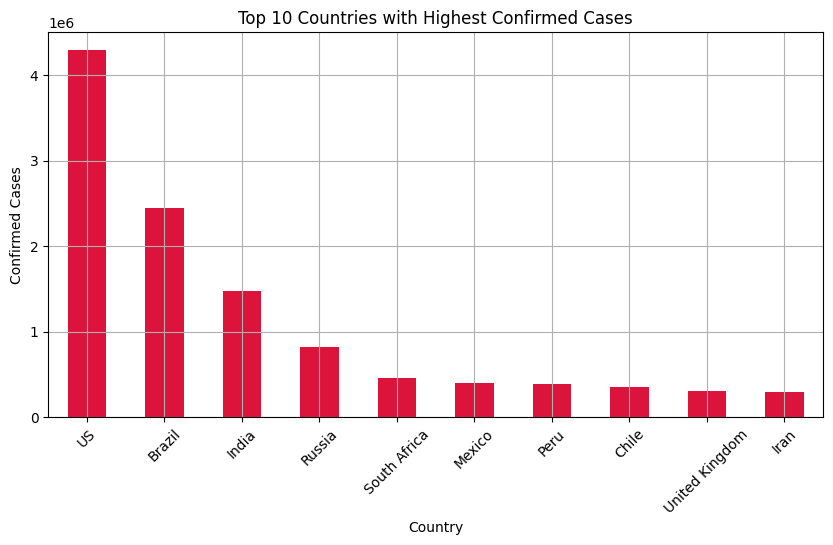

In [12]:
# Plotting the top 10 countries
total_cases.head(10).plot(kind='bar', figsize=(10,5), color='crimson')
plt.title('Top 10 Countries with Highest Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


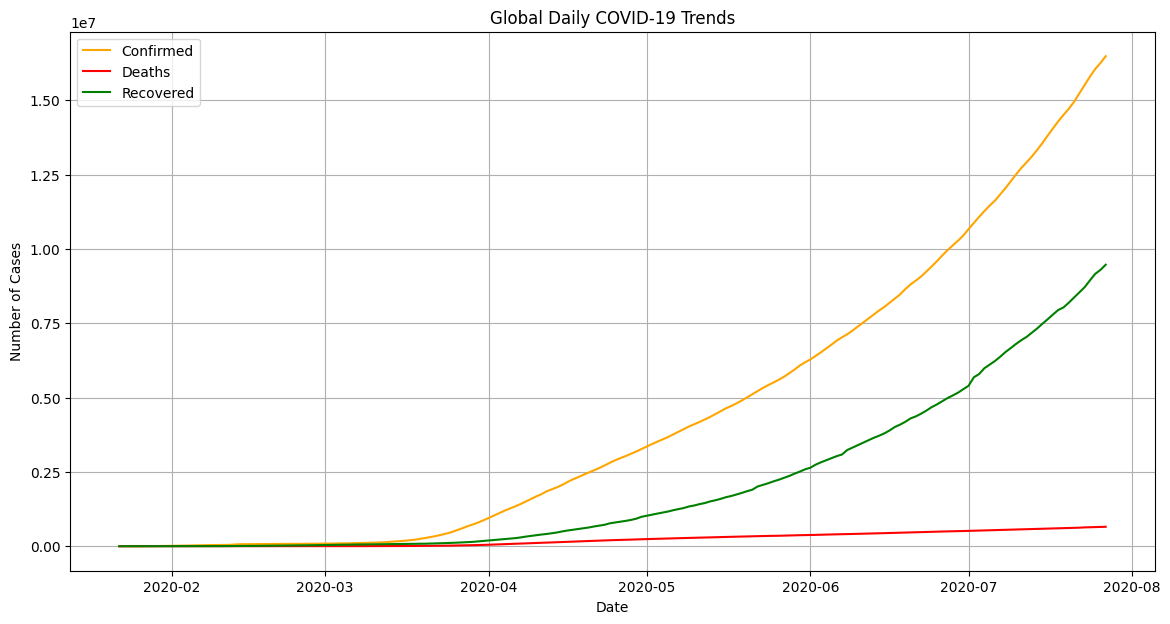

In [13]:
# Group by date to see global trend
daily_trend = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum()

# Plot the trends
plt.figure(figsize=(14,7))
plt.plot(daily_trend.index, daily_trend['confirmed'], label='Confirmed', color='orange')
plt.plot(daily_trend.index, daily_trend['deaths'], label='Deaths', color='red')
plt.plot(daily_trend.index, daily_trend['recovered'], label='Recovered', color='green')
plt.title("Global Daily COVID-19 Trends")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.show()


**Conclusion**

  In this beginner-friendly data science project, I explored a cleaned COVID-19 dataset using Python.

I performed data loading and inspection using pandas, including checking for null values, data types, and basic statistics.

I visualized the spread of COVID-19 using matplotlib and seaborn, focusing on key metrics like confirmed cases, deaths, and recoveries.

I analyzed trends across different countries and over time, identifying where and when the case numbers were highest.

I applied operations like grouping by countries and dates, sorting data, and generating visual plots to make the insights more understandable.



**What I Learned**

*   How to read and process real-world CSV datasets using pandas.

*  How to perform exploratory data analysis (EDA) to understand trends  and distributions.

*  How to create basic plots and line graphs using matplotlib and seaborn.




